# DATA101-001 Final Assessment
You will be performing exploratory data analysis (EDA) on a dataset that has measurements for different hawk species collected over several years. 
- Please provide brief comments in the cells as noted.
- Use of genAI tools are not allowed.
- Make sure that you submit the notebook in the correct format; your work can't be graded otherwise.
- <ins> Late submissions will not receive credit. </ins>

## Dataset
Data is collected on random samples of three different species of hawks: Red-tailed, Sharp-shinned, and Cooper's hawks.
- Month	code 8=September to 12=December
- Day	Date in the month
- Year	Year: 1992-2003
- CaptureTime	Time of capture (HH:MM)
- ReleaseTime	Time of release (HH:MM)
- BandNumber	ID band code
- Species	CH=Cooper's, RT=Red-tailed, SS=Sharp-Shinned
- Age	A=Adult or I=Imature
- Sex	F=Female or M=Male
- Wing	Length (in mm) of primary wing feather from tip to wrist it attaches to
- Weight	Body weight (in gm)
- Culmen	Length (in mm) of the upper bill from the tip to where it bumps into the fleshy part of the bird
- Hallux	Length (in mm) of the killing talon
- Tail	Measurement (in mm) related to the length of the tail (invented at the MacBride Raptor Center)
- StandardTail	Standared measurement of tail length (in mm)
- Tarsus	Length of the basic foot bone (in mm)
- WingPitFat	Amount of fat in the wing pit
- KeelFat	Amount of fat on the breastbone (measured by feel
- Crop	Amount of material in the crop, coded from 1=full to 0=empty

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [27]:
#Read the data and display

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("datas.csv")
df

# Not sure if I was supposed to just use the provided code above but I added the bottom, too. This creates she shape. 
#I left it as a comment for precaution.

#print("Data", df.shape)

#df.info()
#df.describe()
#df.head()*

,rownames,Month,Day,Year,CaptureTime,ReleaseTime,BandNumber,Species,Age,Sex,Wing,Weight,Culmen,Hallux,Tail,StandardTail,Tarsus,WingPitFat,KeelFat,Crop
0,1,9,19,1992,13:30,NaN,877-76317,RT,I,NaN,385.0,920.0,25.7,30.1,219,NaN,NaN,NaN,NaN,NaN
1,2,9,22,1992,10:30,,877-76318,RT,I,NaN,376.0,930.0,NaN,NaN,221,NaN,NaN,NaN,NaN,NaN
2,3,9,23,1992,12:45,,877-76319,RT,I,NaN,381.0,990.0,26.7,31.3,235,NaN,NaN,NaN,NaN,NaN
3,4,9,23,1992,10:50,,745-49508,CH,I,F,265.0,470.0,18.7,23.5,220,NaN,NaN,NaN,NaN,NaN
4,5,9,27,1992,11:15,,1253-98801,SS,I,F,205.0,170.0,12.5,14.3,157,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,904,11,18,2003,14:44,,1177-04777,RT,I,NaN,380.0,1525.0,26.0,27.6,224,227.0,NaN,NaN,3.0,0.0
904,905,11,19,2003,10:18,,803-05985,SS,I,F,190.0,175.0,12.7,15.4,150,153.0,NaN,NaN,4.0,0.0
905,906,11,19,2003,12:02,,1807-53145,RT,I,NaN,360.0,790.0,21.9,27.6,211,215.0,NaN,NaN,2.0,0.0
906,907,11,20,2003,9:56,,1177-04778,RT,I,NaN,369.0,860.0,25.2,28.0,207,210.0,NaN,NaN,2.0,0.0


In [51]:
# This shows how much data is missing from each column
missing_data = df.isnull().sum()
print("Missing data:\n", missing_data)


Missing data:
 rownames          0
Month             0
Day               0
Year              0
CaptureTime       0
ReleaseTime       1
BandNumber        0
Species           0
Age               0
Sex             576
Wing              1
Weight           10
Culmen            7
Hallux            6
Tail              0
StandardTail    337
Tarsus          833
WingPitFat      831
KeelFat         341
Crop            343
dtype: int64


In [31]:
#Display number of rows and columns

rows, columns = df.shape #Returnes a tuple
print("Number of rows:", rows) #Returns the rows
print("Number of columns:", columns) #Returns the columns

Number of rows: 908
Number of columns: 20


In [43]:
#Treating missing data
#Drop 'Sex', 'Tarsus', 'WingPitFat', 'KeelFat', 'Crop', 'StandardTail' as they 
#have several NaN's from the original dataframe.

column_drop = ['Sex', 'Tarsus', 'WingPitFat', 'KeelFat', 'Crop', 'StandardTail'] #What to drop
df_clean = df.drop(columns=column_drop) #Initiates the drop

print("New shape:", df_clean.shape) #Creates new shape

New shape: (908, 14)


In [39]:
#Display the dataframe after the columns mentioned in the previous cell are removed

df_clean #Simply displays the new cleaned up shape


,rownames,Month,Day,Year,CaptureTime,ReleaseTime,BandNumber,Species,Age,Wing,Weight,Culmen,Hallux,Tail
0,1,9,19,1992,13:30,NaN,877-76317,RT,I,385.0,920.0,25.7,30.1,219
1,2,9,22,1992,10:30,,877-76318,RT,I,376.0,930.0,NaN,NaN,221
2,3,9,23,1992,12:45,,877-76319,RT,I,381.0,990.0,26.7,31.3,235
3,4,9,23,1992,10:50,,745-49508,CH,I,265.0,470.0,18.7,23.5,220
4,5,9,27,1992,11:15,,1253-98801,SS,I,205.0,170.0,12.5,14.3,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,904,11,18,2003,14:44,,1177-04777,RT,I,380.0,1525.0,26.0,27.6,224
904,905,11,19,2003,10:18,,803-05985,SS,I,190.0,175.0,12.7,15.4,150
905,906,11,19,2003,12:02,,1807-53145,RT,I,360.0,790.0,21.9,27.6,211
906,907,11,20,2003,9:56,,1177-04778,RT,I,369.0,860.0,25.2,28.0,207


In [49]:
#Test if missing data still exist

missing_data = df_clean.isnull().sum() #Tests for missing data in new set
print("Missing data:\n", missing_data)


Missing data:
 rownames        0
Month           0
Day             0
Year            0
CaptureTime     0
ReleaseTime     1
BandNumber      0
Species         0
Age             0
Wing            1
Weight         10
Culmen          7
Hallux          6
Tail            0
dtype: int64


In [67]:
#Drop 'rownames' column too as it isn't useful for our EDA and display the dataframe after removing it

df_clean = df_clean.drop(columns=['rownames'])
df_clean


KeyError: "['rownames'] not found in axis"

In [71]:
#If there is missing data as seen at the output of the previous cell, drop rows with missing data from the dataframe
#Use reset_index(drop=True) 

df_clean = df_clean.dropna().reset_index(drop=True)

#Initiates final change
print("New shape:", df_clean.shape)
df_clean.head()

In [75]:
#Test the dataframe for missing data one more time :-)

missing = df_clean.isnull().sum()
print("Final Test:\n", missing)

Final Test:
 Month          0
Day            0
Year           0
CaptureTime    0
ReleaseTime    0
BandNumber     0
Species        0
Age            0
Wing           0
Weight         0
Culmen         0
Hallux         0
Tail           0
dtype: int64


In [83]:
##
#Display the final version of the dataframe with the number of columns, column labels, column data types, memory usage,etc.

#Pints the shape
print("Final shape:", df_clean.shape)

#Lists column names
print("Column labels:", df_clean.columns.tolist())

#Shows memory usage
df_clean.info(memory_usage = 'deep')

Final shape: (890, 13)
Column labels: ['Month', 'Day', 'Year', 'CaptureTime', 'ReleaseTime', 'BandNumber', 'Species', 'Age', 'Wing', 'Weight', 'Culmen', 'Hallux', 'Tail']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        890 non-null    int64  
 1   Day          890 non-null    int64  
 2   Year         890 non-null    int64  
 3   CaptureTime  890 non-null    object 
 4   ReleaseTime  890 non-null    object 
 5   BandNumber   890 non-null    object 
 6   Species      890 non-null    object 
 7   Age          890 non-null    object 
 8   Wing         890 non-null    float64
 9   Weight       890 non-null    float64
 10  Culmen       890 non-null    float64
 11  Hallux       890 non-null    float64
 12  Tail         890 non-null    int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 285.3 KB


In [95]:
#Display counts of unique values for each of the species

species = df_clean['Species'].value_counts() #Counts species

print("Count of species:", species)

Count of species: Species
RT    566
SS    255
CH     69
Name: count, dtype: int64


In [101]:
#Display counts of unique values for age 

age_counts = df_clean['Age'].value_counts()

print("Count of ages:" , age_counts)

Count of ages: Age
I    671
A    219
Name: count, dtype: int64


In [ ]:
#Are the two columns you examined in the previous cells balanced?

#Answer: No the columns are not balanced RT, SS, CH are not balances together 

# As for age the age is not balances either immatures outnumber Adults


<function matplotlib.pyplot.show(close=None, block=None)>

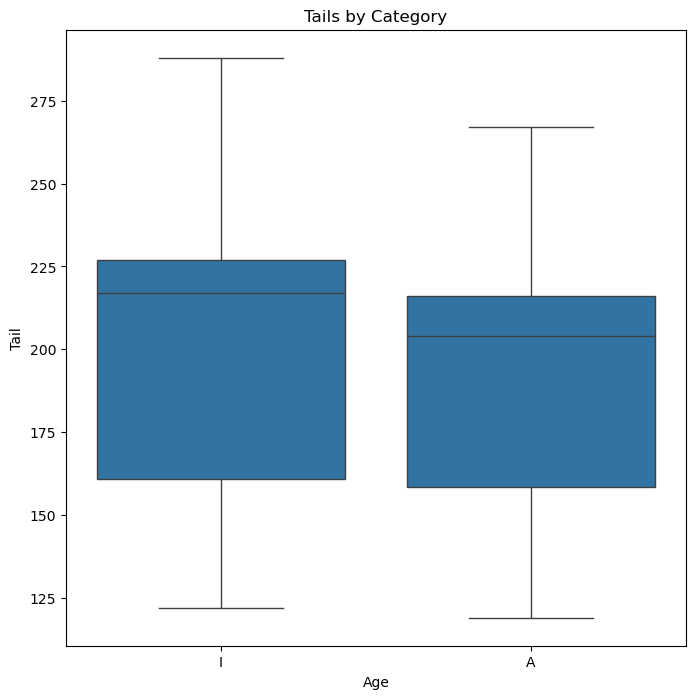

In [111]:
#Create a boxplot with Age and Tail and comment on the distributions in the next cell.

plt.figure(figsize=(8,8))

sns.boxplot(x='Age', y='Tail', data=df_clean)

plt.xlabel('Age') #Age either I or A
plt.ylabel('Tail') #length
plt.title('Tails by Category')
plt.show

In [ ]:
#From the boxplot: are there any outliers; what are the min,max,median values for tail dimension?

#Answer:That I have longer tails then A also the max is 225, min is roughly 160, median is 185

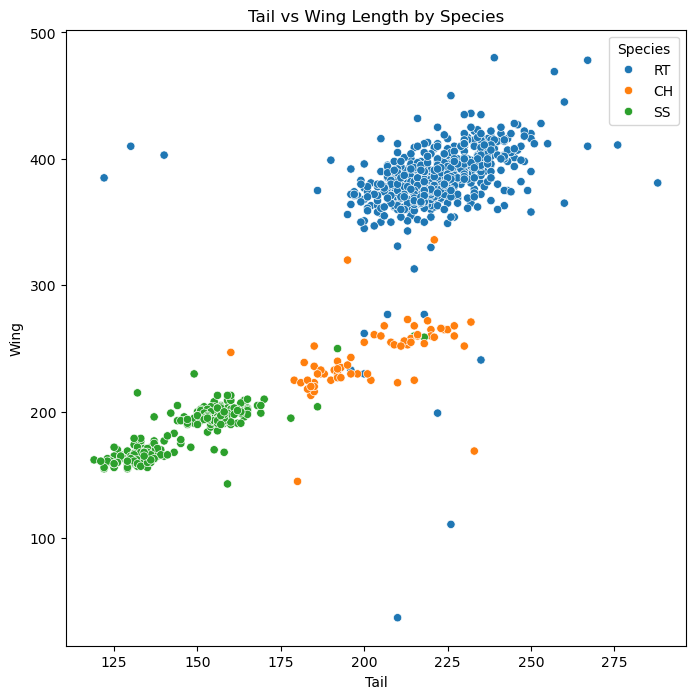

In [113]:
#Create a scatterplot with 'Tail' and 'Wing' and 'Species' 

plt.figure(figsize=(8, 8))

sns.scatterplot(data=df_clean, x='Tail', y='Wing', hue='Species')

plt.xlabel('Tail') #Length
plt.ylabel('Wing') #Length
plt.title('Tail vs Wing Length by Species')
plt.legend(title='Species')
plt.show()

In [ ]:
#Based on the scatterplot, if Tail=150 and Wing=200, what would be the Species of the bird?
#Answer: SS
#In order for a hawk to be in RT species, give a possible set of dimensions for Tail and Wing 
#Answer: 245 Tail and 400 Wing

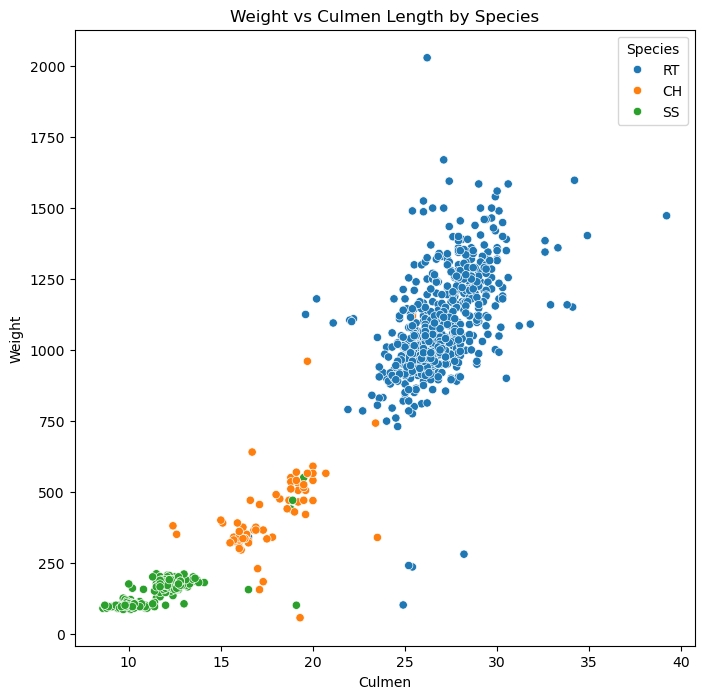

In [115]:
#Scatterplot for Weight, Culmen and Species

plt.figure(figsize=(8, 8))

sns.scatterplot(data=df_clean, x='Culmen', y='Weight', hue='Species')

plt.xlabel('Culmen') #Length
plt.ylabel('Weight')
plt.title('Weight vs Culmen Length by Species')
plt.legend(title='Species')
plt.show()

In [ ]:
#Based on the scatterplot, if a bird has a weight of 1250 what would be its predicted species?
#Answer: RT
#What if it has a weight of 500 and culmen of 20?
#Answer: CH

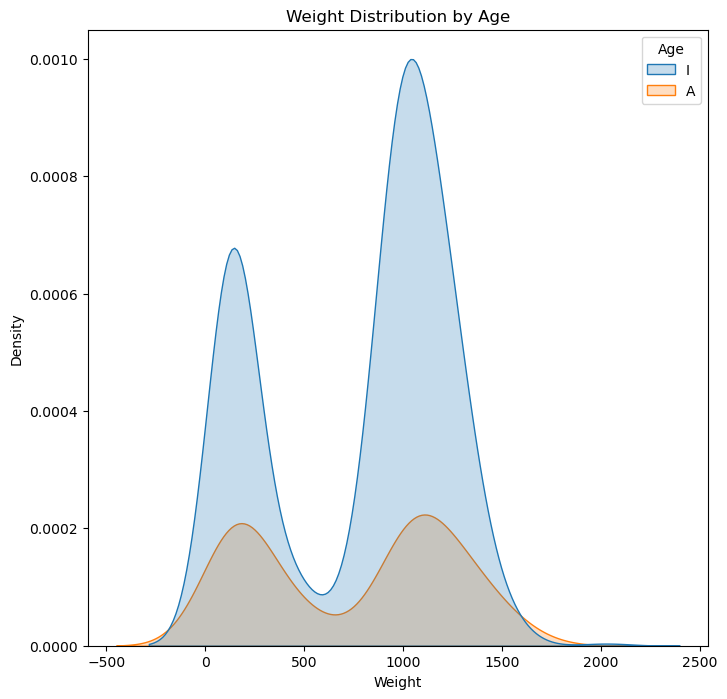

In [117]:
#kdeplot for weight and Age

plt.figure(figsize=(8, 8))

sns.kdeplot(data=df_clean, x='Weight', hue='Age', fill=True)

plt.xlabel('Weight')
plt.title('Weight Distribution by Age')
plt.show()

C:\Users\usaas\AppData\Local\Temp\ipykernel_8248\2411716007.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


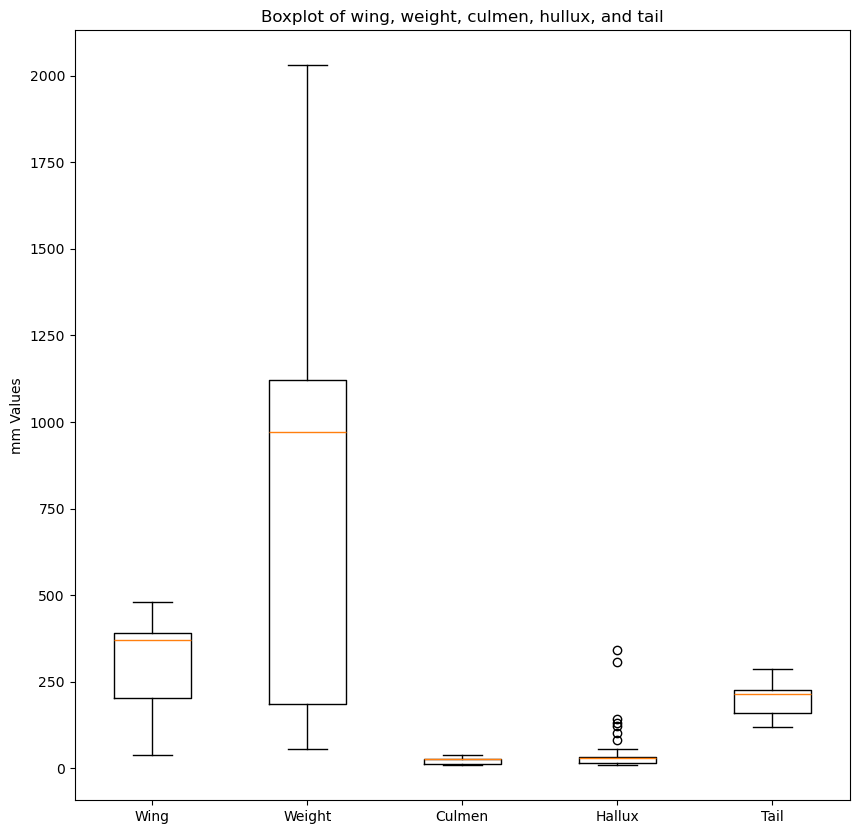

In [121]:
#Create a boxplot using numerical variables/columns: Wing, Weight, Culmen, Hallux, Tail

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

plt.boxplot(
    [
        df_clean['Wing'],
        df_clean['Weight'],
        df_clean['Culmen'],
        df_clean['Hallux'],
        df_clean['Tail'],
    ],
    labels = ['Wing', 'Weight', 'Culmen', 'Hallux', 'Tail']

)

plt.title('Boxplot of wing, weight, culmen, hullux, and tail')
plt.ylabel('mm Values')
plt.show()

In [ ]:
#Comment on the boxplot: outliers, min, max, median values for each varibale/column
#Answer: Culmen and Hallux are small
#Wing, min is 35, max, 480, med 380
#Weight, min is 55, max is 2030, med is 975
#Culmen, min is 55, max is 38, med is 20
#Hallux, min is 5, max is 45, med is 20
#Tail, min is 120, max is 300, med is 200

In [123]:
#Group the dataframe acording to species and calculate the average weight (use mean()) for each.

avg_weight = df_clean.groupby('Species')['Weight'].mean()

#Results
print("Average Weight (g) by Species:")
print(avg_weight)

Average Weight (g) by Species:
Species
CH     419.623188
RT    1095.150177
SS     148.156863
Name: Weight, dtype: float64


In [125]:
#Create a new variable by grouping according to the year, and calculate the total number of hawks observed (use Species) 

hawk_count = df_clean.groupby('Year')['Species'] \
    .count() \
    .reset_index(name = 'Total_Hawks')

print("Total Hawks:")
print(hawk_count)

Total Hawks:
    Year  Total_Hawks
0   1992           35
1   1993           37
2   1994          128
3   1995           72
4   1996           18
5   1997           78
6   1998           33
7   1999           83
8   2000          115
9   2001           84
10  2002           99
11  2003          108


In [ ]:
# Which year has the highest number of hawks as evidenced by the ouput generated in the previous cell?
#Answer:  1994

In [133]:
#Obtain the correlation on numeric columns and comment on the values
#If we were to use multiple linear regression to predict the weight, what are the top two variables highly correlated with it?

num = df_clean.select_dtypes(include='number') #Columns

corr_matrix = num.corr() #Computes matrix

print("Correlation matrix:\n", corr_matrix)

##If we were to use multiple linear regression to predict the weight, what are the top two variables highly correlated with it?

#Answers: It would be Wings and Tails since they have the highest correlation based on data

Correlation matrix:
            Month       Day      Year      Wing    Weight    Culmen    Hallux  \
Month   1.000000 -0.476233  0.011001  0.144810  0.188258  0.152702 -0.005332   
Day    -0.476233  1.000000 -0.024836  0.008989 -0.009850 -0.016947 -0.005938   
Year    0.011001 -0.024836  1.000000 -0.209960 -0.177662 -0.173282 -0.129595   
Wing    0.144810  0.008989 -0.209960  1.000000  0.934854  0.958657  0.433272   
Weight  0.188258 -0.009850 -0.177662  0.934854  1.000000  0.953366  0.429813   
Culmen  0.152702 -0.016947 -0.173282  0.958657  0.953366  1.000000  0.440896   
Hallux -0.005332 -0.005938 -0.129595  0.433272  0.429813  0.440896  1.000000   
Tail    0.105251 -0.004851 -0.202926  0.899731  0.874598  0.914166  0.414247   

            Tail  
Month   0.105251  
Day    -0.004851  
Year   -0.202926  
Wing    0.899731  
Weight  0.874598  
Culmen  0.914166  
Hallux  0.414247  
Tail    1.000000  


In [ ]:
#If we were to use multiple linear regression to predict the weight, what are the top two variables highly correlated with it?
#Answer: Wing and Tail